# Spatial Processing

In spatial processing, the pixel intensity $z$ is tranformed to $s=T(z)$.

For example, to form the negative of an image, we use the transform

\begin{equation}
s = 255 - z
\end{equation}

Consider the image below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
# example image
I = np.array(([255,0], [0, 255]))

I_neg = 255 - I

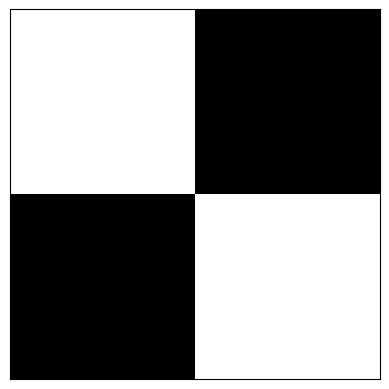

In [3]:
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

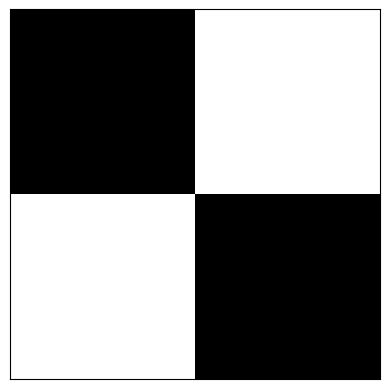

In [4]:
plt.imshow(I_neg, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

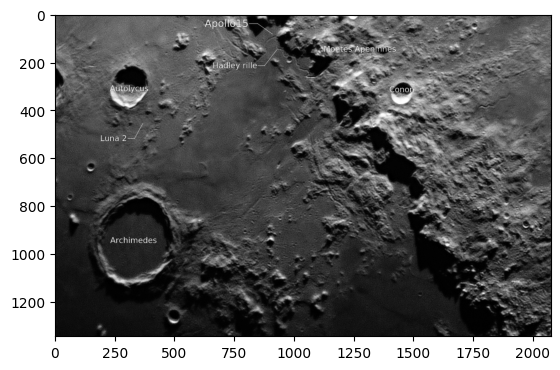

In [5]:
image = img.imread("img/Apollo-15-landing-site.jpg")
plt.imshow(image, cmap='gray')
plt.show()

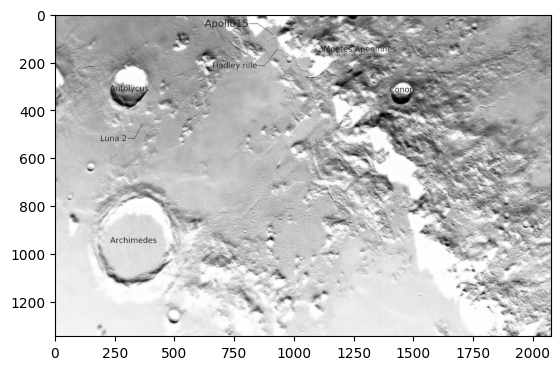

In [6]:
image_neg = 255 - image
plt.imshow(image_neg, cmap='gray')
plt.show()

## Log Transformations

In this case we have

\begin{equation}
s = c\log(1+r)
\end{equation}

where $r$ is the input intensity level and $s$ is the output. $c$ is a constant.

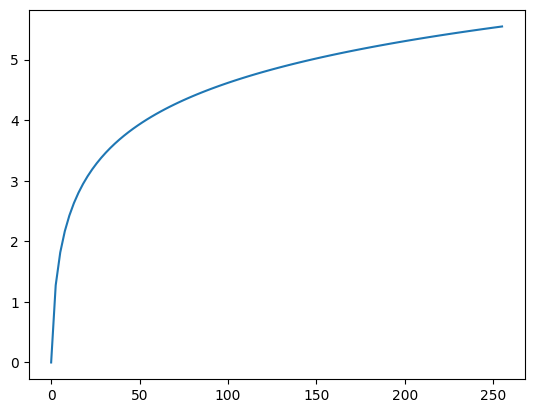

In [7]:
r = np.linspace(0, 255, 100)
plt.plot(r, np.log(1 + r))

/tmp/ipykernel_345439/2183979864.py:1: RuntimeWarning: divide by zero encountered in log
  image_log = np.log(1  + image)


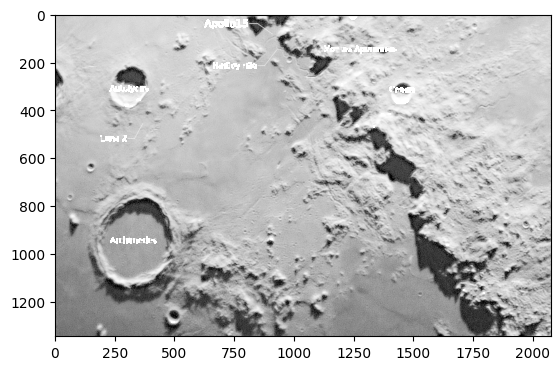

In [8]:
image_log = np.log(1  + image)
plt.imshow(image_log, cmap='gray')
plt.show()

The log transformation expands the values of dark pixels and compresses higher values.

## Power Law (Gamma) Transformations

Here, 

\begin{equation}
s=cr^\gamma
\end{equation}

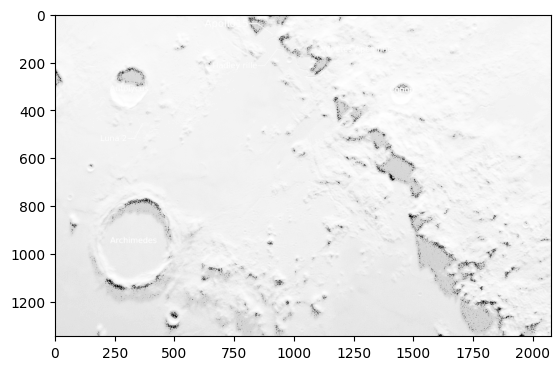

In [9]:
gamma = 0.04
image_gamma = image ** gamma
plt.imshow(image_gamma, cmap='gray')
plt.show()

# Neighbourhood Operations
In neighbourhood operations, we use information from pixels in the neighbourhood $S_{xy}$ of the the pixel of interest $(x,y)$ to compute the pixel value in the transformed image. For example, we would perform averaging using the expression below:

\begin{equation}
g(x,y) = \frac{1}{mn}\sum_{(r,c)\in S_{xy}}f(r,c)
\end{equation}

# Affine Transforms
Let $(x,y)$  be the pixels in the transformed image and $(\upsilon, w)$ be the pixel in the original image. Affine transforms map pixel locations in the original image to locations in the transformed image. These can be expressed as a matrix operation as

\begin{equation}
[x,y,1]=[\upsilon, w, 1]\mathbf{T}
\end{equation}

Where $\mathbf{T}$ is the transformation matrix.
\begin{equation}
\mathbf{T}=\begin{bmatrix}
t_{11} & t_{12}&0 \\
t_{21} & t_{22}&0 \\
t_{31} & t_{32}&1 \\
\end{bmatrix}
\end{equation}

## Scaling
\begin{equation}
\mathbf{T}=\begin{bmatrix}
c_x & 0&0 \\
0 & c_y&0 \\
0 & 0&1 \\
\end{bmatrix}
\end{equation}

## Rotation
\begin{equation}
\mathbf{T}=\begin{bmatrix}
\cos\theta & \sin\theta&0 \\
-\sin\theta & \cos\theta&0 \\
0 & 0&1 \\
\end{bmatrix}
\end{equation}

## Translation
\begin{equation}
\mathbf{T}=\begin{bmatrix}
1 & 0&0 \\
0 &1&0 \\
t_x & t_y&1 \\
\end{bmatrix}
\end{equation}


In [10]:
# examples in Open CV
import cv2 as cv
image = cv.imread('img/Apollo-15-landing-site.jpg', cv.IMREAD_GRAYSCALE)

rows,cols = image.shape

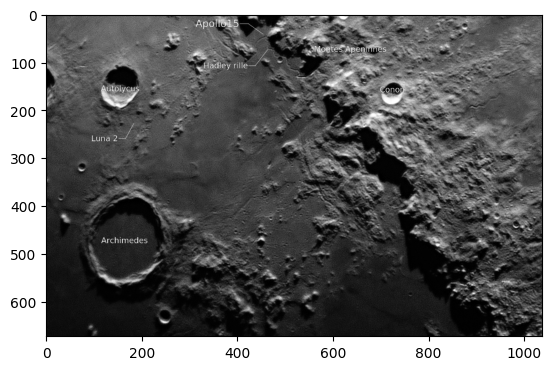

In [11]:
# scaling
M = np.float32([[.5,0,0],[0,.5,0]])
dst = cv.warpAffine(image,M,(cols,rows))
plt.imshow(dst[0:rows // 2, 0:cols//2], cmap='gray')
plt.show()

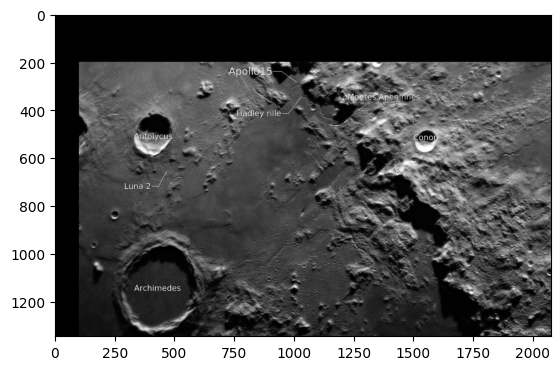

In [12]:
# translation
M = np.float32([[1,0,100],[0,1,200]])
dst = cv.warpAffine(image,M,(cols,rows))
plt.imshow(dst, cmap='gray')
plt.show()

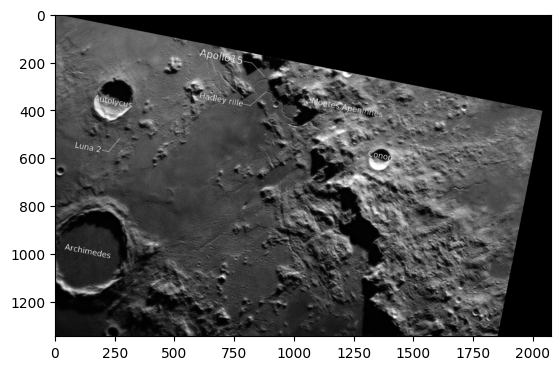

In [13]:
# rotation
theta = np.pi / 16
M = np.float32([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0]])
dst = cv.warpAffine(image,M,(cols,rows))
plt.imshow(dst, cmap='gray')
plt.show()

## Arithmetic Operations
Arithmetic operations of addition, subtraction, multiplication and division can be defined for images with the operations performed pixel by pixel for images of the same size.

### Example
We can process images to enhance certain features. For example for a drone image we can define a Green Leaf Index (GLI) as
\begin{equation}
GLI = \frac{2G - R - B}{2G+R+B}
\end{equation}

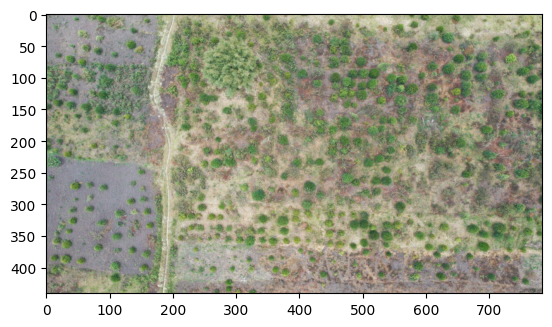

In [14]:
image = img.imread("img/drone-example.jpg")
plt.imshow(image)
plt.show()

In [15]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]


GLI = np.zeros((R.shape[0], R.shape[1]))

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        GLI[i, j] = (2*G[i,j] - R[i,j] - B[i,j]) / (2*G[i,j] + R[i,j] + B[i,j])

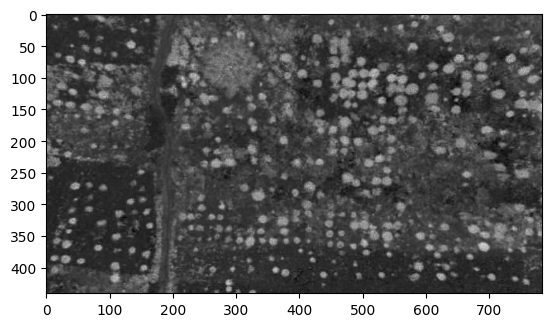

In [16]:
plt.imshow(GLI, cmap='gray')
plt.show()